**Name :** Omair Ansari

**Email :** ansari.omair10@gmail.com

**Number :** 8755388911


## **Inputting libraries**

In [ ]:
pip install rake-nltk

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rake_nltk import Rake
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

## **Importing dataset**

In [100]:
posts=pd.read_csv("posts.csv")
users=pd.read_csv("users.csv")
views=pd.read_csv("views.csv")

In [101]:
users.tail()

,_id,name,gender,academics
113,5ed35aa376027d35905cca67,Steve,male,graduate
114,5ed3737976027d35905ccaa2,Himanshu Singh,male,undergraduate
115,5ed3748576027d35905ccaab,Parth Vijay,male,undergraduate
116,5ed3cbcbbd514d602c1530a7,Abhishek Mishra,male,undergraduate
117,5ed3e898bd514d602c1530de,gauri raskar,female,graduate


In [102]:
posts.tail()

,_id,title,category,post_type
488,5ed3791976027d35905ccab6,CI/CD using GitHub Actions,Computer Technology|Information Technology,blog
489,5ed3820f76027d35905ccac8,Configure Docker with Django; PostgreSQL; Pg-a...,Computer Technology|Computer Application|Infor...,blog
490,5ed3ef4cbd514d602c1530f2,Recommendation Engine,NaN,project
491,5ed415c6bd514d602c15312d,Face Recognition using Transfer Learning.,Science; Technology,skill
492,5ed4cbadbd514d602c1531a6,Configure CI/CD Pipeline in GitLab and deploym...,Computer Technology|Computer Application|Infor...,blog


In [103]:
views.tail()

,user_id,post_id,timestamp
1444,5d60098a653a331687083238,5e7a60edcfc8b713f5ac7d82,2020-03-26T19:03:55.284Z
1445,5d60098a653a331687083238,5e7a629ccfc8b713f5ac7d84,2020-03-26T19:01:42.384Z
1446,5d60098a653a331687083238,5e7b1e65cfc8b713f5ac7d90,2020-03-26T19:00:25.693Z
1447,5d60098a653a331687083238,5e7cc074cfc8b713f5ac7db0,2020-03-26T18:49:14.721Z
1448,5d60098a653a331687083238,5e1029f22a37d20505da2a79,2020-03-26T18:25:45.637Z


**Renaming columns so we can merge all the databases into one**

In [104]:
df=users

In [105]:
df.rename(columns = {'_id':'user_id'}, inplace = True) 

In [106]:
posts.rename(columns = {'_id':'post_id'}, inplace = True) 
posts.category.fillna("General", inplace = True) 

In [107]:
df=pd.merge(df,views,on='user_id')

In [108]:
df.head()

,user_id,name,gender,academics,post_id,timestamp
0,5d60098a653a331687083238,Nivesh Singh Chauhan,male,undergraduate,5ed3820f76027d35905ccac8,2020-05-31T18:01:54.308Z
1,5d60098a653a331687083238,Nivesh Singh Chauhan,male,undergraduate,5ed1ff0276027d35905cc60d,2020-05-31T08:21:29.911Z
2,5d60098a653a331687083238,Nivesh Singh Chauhan,male,undergraduate,5ecf96e876027d35905cbf46,2020-05-29T19:13:27.566Z
3,5d60098a653a331687083238,Nivesh Singh Chauhan,male,undergraduate,5ecfa0ca76027d35905cbf57,2020-05-29T19:10:50.010Z
4,5d60098a653a331687083238,Nivesh Singh Chauhan,male,undergraduate,5ed0e20776027d35905cc2fe,2020-05-29T19:10:23.887Z


In [109]:
df=pd.merge(df,posts,on='post_id')

## **Checking for Null values**

In [110]:
Null=[]
for i in df:
 Null.append((i,df[i].isna().mean()*100))
Null=pd.DataFrame(Null,columns=['class','per'])
Null

,class,per
0,user_id,0.000000
1,name,0.000000
2,gender,0.000000
3,academics,0.000000
4,post_id,0.000000
5,timestamp,0.000000
6,title,0.000000
7,category,6.081548
8,post_type,0.000000


**Dropping all rows where null values are present**

In [111]:
df = df.dropna()

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot stylings
plt.style.use('fivethirtyeight')
%matplotlib inline

## **Data Visualization**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


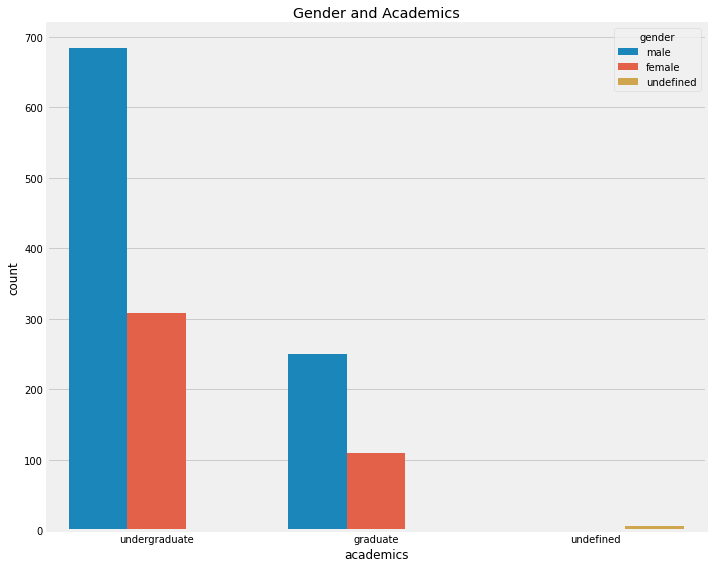

In [113]:
fig, ax = plt.subplots(figsize = (10,8))
sns.countplot('academics',hue='gender',data=df)
ax.set_title('Gender and Academics')
fig.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


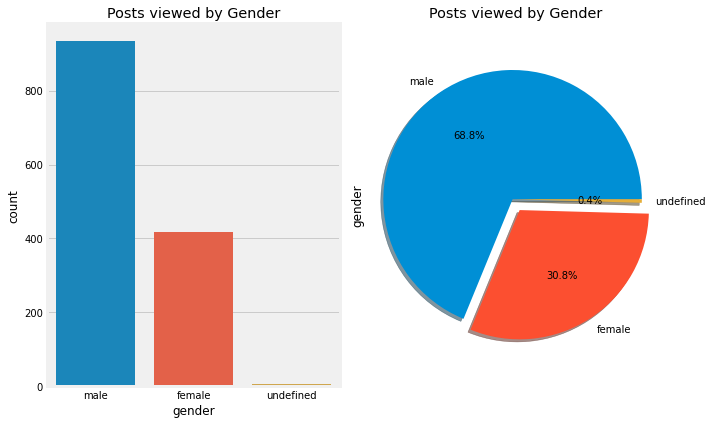

In [59]:
fig, ax = plt.subplots(1,2,figsize = (10,6))

sns.countplot('gender',data=df,ax=ax[0])
ax[0].set_title('Posts viewed by Gender')

df['gender'].value_counts().plot.pie(explode=[0,0.1,0],autopct='%1.1f%%',shadow=True,ax=ax[1])
ax[1].set_title('Posts viewed by Gender')
ax[1].axis('equal') 

fig.tight_layout()
plt.show()

## **Building the model (Contest based filtering)**

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

## **Creating a TF-IDF Vectorizer**

In [115]:
tf = TfidfVectorizer(analyzer='word', sublinear_tf=True, ngram_range=(1, 3), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(df['category'])
tfidf_matrix.shape

(1359, 1099)

In [116]:
tf.get_feature_names()[:-30:-1]

['zoology environmental biology',
 'zoology environmental',
 'zoology ecology',
 'zoology',
 'work substance abuse',
 'work substance',
 'work social tech',
 'work social interventions',
 'work social',
 'work ngo',
 'work humanities social',
 'work humanities',
 'work health education',
 'work health',
 'work',
 'wood crafts craft',
 'wood crafts',
 'wood carving',
 'wood',
 'web designing database',
 'web designing artificial',
 'web designing',
 'web',
 'watercolours pen ink',
 'watercolours pen',
 'watercolours painting',
 'watercolours drawings',
 'watercolours acrylics',
 'watercolours 2d composition']

## **Cosine Similarities**

In [117]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [118]:
postid = df['post_id']
indices = pd.Series(posts.index, index=posts['post_id'])
indices.head()

post_id
5d62abaa65218653a132c956    0
5d6d39567fa40e1417a4931c    1
5d7d23315720533e15c3b1ee    2
5d7d405e5720533e15c3b1f3    3
5d80dfbc6c53455f896e600e    4
dtype: int64

In [119]:
posts.head()

,post_id,title,category,post_type
0,5d62abaa65218653a132c956,hello there,Plant Biotechnology,blog
1,5d6d39567fa40e1417a4931c,Ml and AI,Artificial Intelligence|Machine Learning|Infor...,blog
2,5d7d23315720533e15c3b1ee,What is an Operating System ?,Operating Systems,blog
3,5d7d405e5720533e15c3b1f3,Lord Shiva,Drawings,artwork
4,5d80dfbc6c53455f896e600e,How Competition law evolved?,Competition Laws,blog


In [130]:
def item(id):
    return posts.loc[posts['post_id'] == id]['title'].tolist()[0]

## **Model for recommending similar posts for the given post.**

In [132]:
def get_recommendations(postid, num, indices):
    idx = indices[postid]
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num+1]
    # print(sim_scores)
    indices = [i[0] for i in sim_scores]
    print("Recommending " + str(num) + " posts similar to \"" + item(postid))
    return posts.iloc[indices]

In [147]:
posts['brief'] = posts['title'] + " " +posts['category'] + " " + posts['post_type']
posts.head()

,post_id,title,category,post_type,brief
0,5d62abaa65218653a132c956,hello there,Plant Biotechnology,blog,hello there Plant Biotechnology blog
1,5d6d39567fa40e1417a4931c,Ml and AI,Artificial Intelligence|Machine Learning|Infor...,blog,Ml and AI Artificial Intelligence|Machine Lear...
2,5d7d23315720533e15c3b1ee,What is an Operating System ?,Operating Systems,blog,What is an Operating System ? Operating System...
3,5d7d405e5720533e15c3b1f3,Lord Shiva,Drawings,artwork,Lord Shiva Drawings artwork
4,5d80dfbc6c53455f896e600e,How Competition law evolved?,Competition Laws,blog,How Competition law evolved? Competition Laws ...


In [148]:
tf = TfidfVectorizer(analyzer='word', sublinear_tf=True, ngram_range=(1, 8), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(posts['brief'])
tfidf_matrix.shape

(493, 9235)

In [150]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [151]:
get_recommendations('5eac305f10426255a7aa9dd3', 10, indices)

Recommending 10 posts similar to "She got a new hairstyle! Photo by Chiragfor


,post_id,title,category,post_type,brief
367,5eac315210426255a7aa9dfe,Street Art by Chirag.,Photography,artwork,Street Art by Chirag. Photography artwork
338,5ea1d7ac10426255a7aa9a66,Too much?,Photography,artwork,Too much? Photography artwork
451,5ecd6ba47023451e66223604,Be yourself !!,Photography,artwork,Be yourself !! Photography artwork
252,5e9483b6a3258347b42f2860,PEACE,Photography,artwork,PEACE Photography artwork
260,5e948db6a3258347b42f28b2,peace,Photography,artwork,peace Photography artwork
347,5ea321dd10426255a7aa9abd,Peace.,Photography,artwork,Peace. Photography artwork
205,5e8307ada3258347b42f23ec,Aesthetic,Photography,artwork,Aesthetic Photography artwork
345,5ea31faf10426255a7aa9ab5,Aesthetic.,Photography,artwork,Aesthetic. Photography artwork
348,5ea3227010426255a7aa9ac1,Aesthetic.,Photography,artwork,Aesthetic. Photography artwork
364,5eabf76a10426255a7aa9cfb,Street Art Photo by Mathilde Decourcelle,Photography,artwork,Street Art Photo by Mathilde Decourcelle Photo...


## **Model for Recommending posts for the given user.**

In [170]:
def get_user(user_id, num, indices):
    for i,j in zip(df["user_id"],df["post_id"]):
      if(i==user_id):
        postid=j
    for i,z in zip(df["user_id"],df["name"]):
      if(i==user_id):
        name=z
        
    idx = indices[postid]
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num+1]
    # print(sim_scores)
    indices = [i[0] for i in sim_scores]
    print("Recommending " + str(num) + "  posts for " + name + " since you liked "+item(postid))
    return posts.iloc[indices]

In [171]:
get_user('5d60098a653a331687083238', 10, indices)

Recommending 10  posts for Nivesh Singh Chauhan since you liked Chat App UI Desgin


,post_id,title,category,post_type,brief
10,5da745b6019399436815c4cd,Corporate design,Graphic|Graphic Design,artwork,Corporate design Graphic|Graphic Design artwork
191,5e81bf2fa3258347b42f2244,Disease Prevention,Graphic Design,artwork,Disease Prevention Graphic Design artwork
444,5ecb7155eaff6b0c3a58a486,Eid Mubarak,Photography|Architecture|Visual Arts|Graphic D...,artwork,Eid Mubarak Photography|Architecture|Visual Ar...
445,5ecb72c0eaff6b0c3a58a48e,EID MUBARAK,Photography|Architecture|Visual Arts|Graphic D...,artwork,EID MUBARAK Photography|Architecture|Visual Ar...
446,5ecb7567eaff6b0c3a58a4cf,Design Process,Visual Arts|Graphic Design|2D Composition|Logo...,artwork,Design Process Visual Arts|Graphic Design|2D C...
200,5e81c257a3258347b42f22f0,Mask: When to use it,Graphic Design|Visual Arts,artwork,Mask: When to use it Graphic Design|Visual Art...
42,5e2d516fc85ab714a7da66dd,'The Virtual ME',Fashion Design|Visual Arts|Graphic Design|Arti...,artwork,'The Virtual ME' Fashion Design|Visual Arts|Gr...
439,5ec821ddec493f4a2655889e,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork,Save Earth. Visual Arts|Graphic Design|Artisti...
19,5dbc622a99cbb90e4339c7f6,Best friend,Graphic Design|Visual Arts|Illustration|Graphic,artwork,Best friend Graphic Design|Visual Arts|Illustr...
41,5e2d4d63c85ab714a7da66db,Magazine Cover Redefined,Photography|Fashion Design|Visual Arts|Graphic...,artwork,Magazine Cover Redefined Photography|Fashion D...
